# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sinasc = pd.read_csv('sinasc_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [4]:
sinasc.loc[sinasc['APGAR5'] >= 8, 'nivel_asfixia'] = 'normal'
sinasc.loc[(sinasc['APGAR5'] == 6) | (sinasc['APGAR5'] == 7), 'nivel_asfixia'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] == 4) | (sinasc['APGAR5'] == 5), 'nivel_asfixia'] = 'asfixia moderada'
sinasc.loc[sinasc['APGAR5'] <= 3, 'nivel_asfixia'] = 'asfixia grave'

#No exercicio dá a entender que é pra sobrescrever o APGAR5, mas criei uma nova coluna em vez de sobrescrever o APGAR5 pra não perder a informação original

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

C:\Users\lucia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


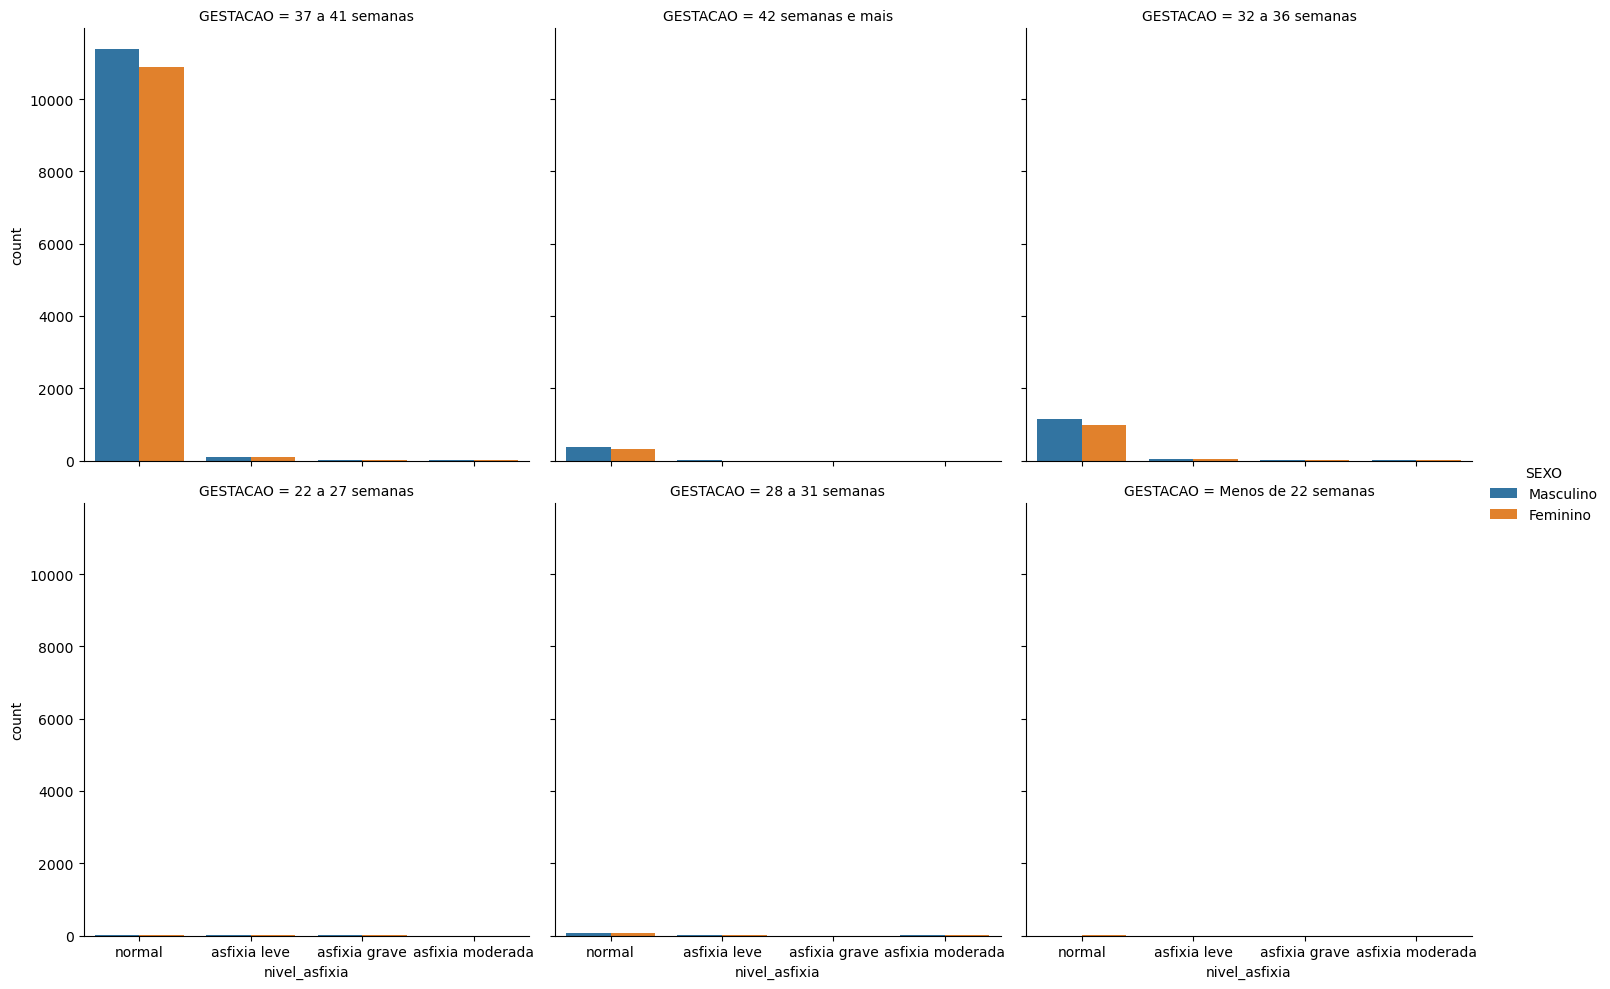

In [37]:
sns.catplot(col='GESTACAO', x='nivel_asfixia', hue='SEXO', kind='count', col_wrap=3, data=sinasc)

In [ ]:
#devido à contagem na gestação de 37 a 41 semanas ser muito maior, a escala torna os outros gráficos ilegíveis. 
#para visualizar melhor essa comparação é necessário calcular as porcentagens da contagem por cada gestação:

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [22]:
freq = pd.crosstab(sinasc['GESTACAO'], sinasc['nivel_asfixia'])
freq

nivel_asfixia,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [23]:
freq_pctlin = freq.div(freq.sum(axis=1), axis=0)
freq_pctlin

nivel_asfixia,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

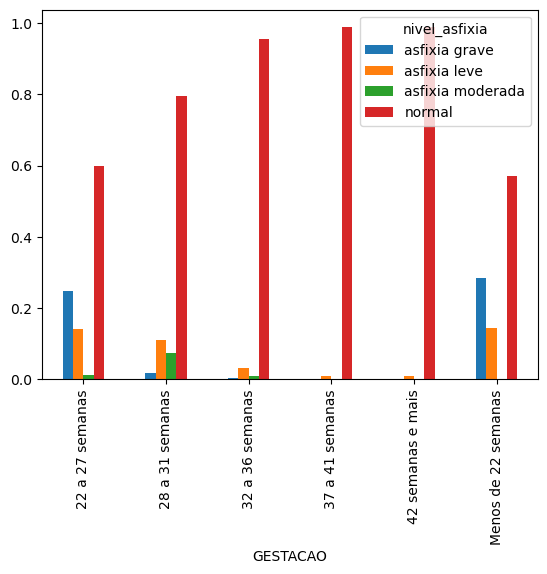

In [24]:
freq_pctlin.plot.bar()

In [ ]:
#o conjunto de dados corrobora com a afirmação dos médicos, pois a partir de 36 semanas para baixo, as ocorrências de asfixia passam a ser notáveis, crescendo conforme o número de semanas diminui.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='nivel_asfixia', ylabel='PESO'>

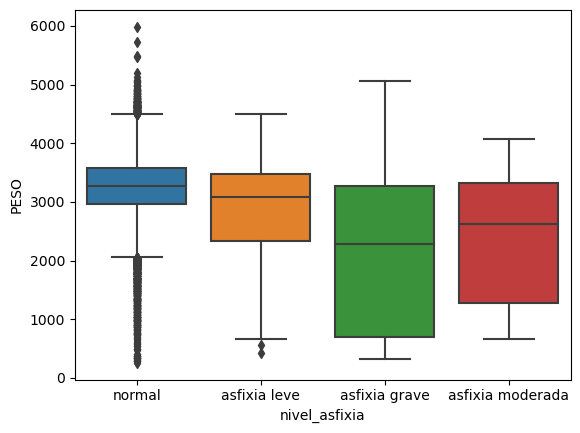

In [27]:
sns.boxplot(data=sinasc, y='PESO', x='nivel_asfixia')

In [ ]:
#o boxplot mostra que há uma diferença na distribuição do peso para os diferentes níveis de asfixia, sendo que há uma concentração maior em pesos abaixo de 2500g nos casos de asfixia grave e moderada